# Преобразования Фурье

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as spi


from scipy.linalg import dft, norm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install librosa

In [ ]:
import librosa

$\Re$
$\Im$
$\hat{a}$

## Задание 1. Вещественное: $f: \mathbb{R}→\mathbb{R}$

*N.B -  Используем унитарное преобразование Фурье к угловой частоте $\omega$*, оно будет выглядеть следующим образом

- Исходная функция
$$
f(t) = \frac{1}{\sqrt{2\pi}}\int^{+\infty}_{-\infty}c(\omega)e^{i\omega t}d\omega
$$
- Фурье-образ:
$$
c(\omega) = \frac{1}{\sqrt{2\pi}}\int^{+\infty}_{-\infty}f(t)e^{-i\omega t}dt
$$

### Прямоугольная функция

In [ ]:
a = 2; b = 8

In [ ]:
x = np.linspace(-10,10,8000)

In [ ]:
def f1(t):
    if abs(t) <= b:
        return a
    elif abs(t) > b:
        return 0

vec_f1 = np.vectorize(f1)

In [ ]:
def ff(t):
  return np.cos(2*np.pi*t)*((np.exp(t) + np.exp(-t))/ 2)

In [ ]:
spi.quad(lambda t: ff(t), -100, 100)

(6.640865184672848e+41, 7.873422911854389e+33)

Приведите аналитическое выражение её Фурье-образа $\hat{f}(\omega)$, также его вывод

In [ ]:
def f1_image(omega):
  return ((2*a*b*np.sinc(omega*b))/np.sqrt(np.pi * 2))

In [ ]:
def plot_original_and_image(x, f, f_image):
  figure, axis = plt.subplots(1, 2, figsize=(10, 6))

  axis[0].plot(x, [f(t) for t in x])
  axis[0].set_title(f"Original func with (a, b) = ({a}, {b})")
  axis[0].set_xlabel('t')
  axis[0].set_ylabel('y(t)')

  axis[1].plot(x, [f_image(t) for t in x])
  axis[1].set_title(f"Fourier image with (a, b) = ({a}, {b})")
  axis[1].set_xlabel('t')
  axis[1].set_ylabel('y(t)')

  plt.show()

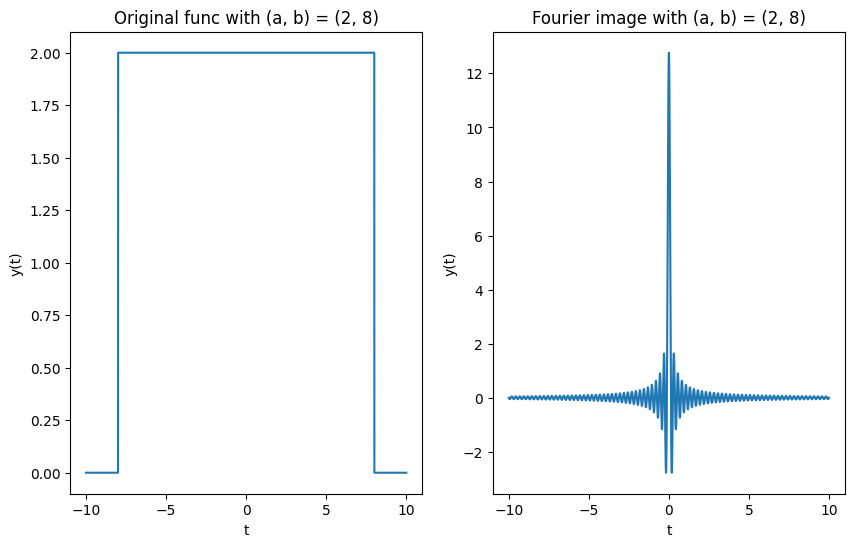

In [ ]:
plot_original_and_image(x, vec_f1,f1_image)

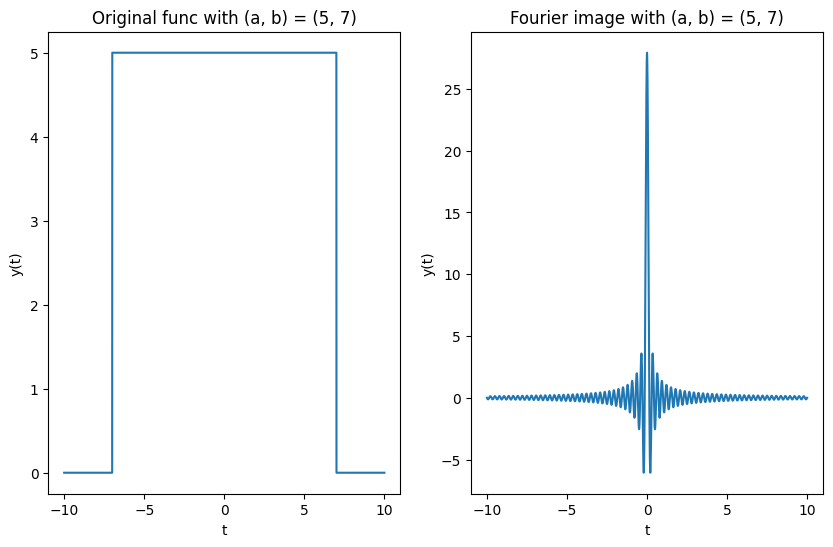

In [ ]:
a = 5; b = 7;plot_original_and_image(x, vec_f1,f1_image)

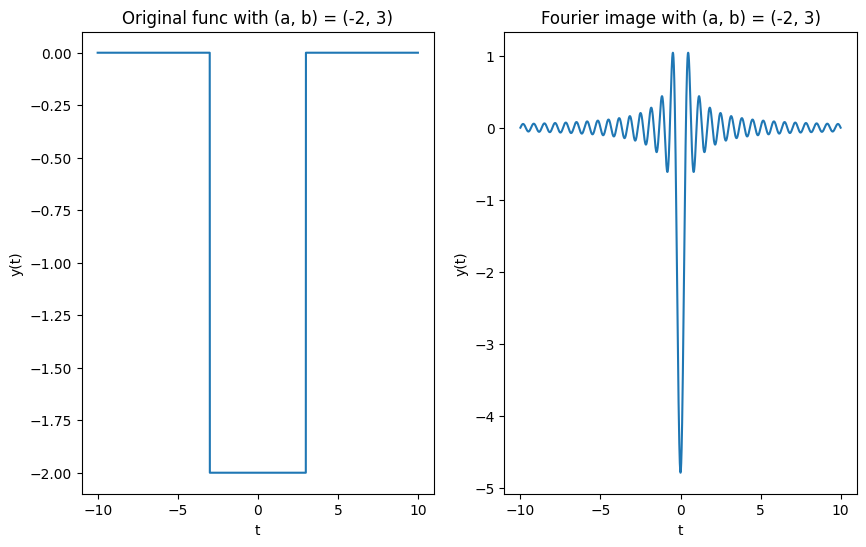

In [ ]:
a = -2; b = 3; plot_original_and_image(x, vec_f1,f1_image)

Проверим равенство Парсеваля, в нашем случае оно будет выглядеть следующим
$$
||f||_2 = ||\mathbb{F}f||_2
$$, где $\mathbb{F}$ - оператор Фурье, а норму функции мы ищем на отрезке $(-\pi, \pi)$

Также вспомним про то, что применение оператора Фурье на функцию равняется её фурье образу...
$$
\mathbb{F}f = \hat{f}
$$ А значит можно записать равенство Парсеваля в более приближенной форме:



Полезно также знать, что у равенства Парсеваля в такой форме отображается полезное физическое свойство:

Важное соотношение между энергией сигнала во временной области и энергетическим спектром
в частотной области дается тождеством Парсеваля для преобразований Фурье

In [ ]:
def check_parseval(f, f_image):
  INT1, err1 = spi.quad(lambda t: abs(f(t))**2, -10**7, 10**7)
  INT2, err2 = spi.quad(lambda omega: abs(f_image(omega))**2, -10**7, 10**7)
  print(f"integrals: {INT1}  {INT2}")
  print(f"errors: {err1}  {err2}")
  print(f"delta: {abs(INT1-INT2):.5f}")

check_parseval(vec_f1, f1_image)

integrals: 0.0  0.01703089389991076
errors: 0.0  0.03265618835296868
delta: 0.01703


### Анализ влияния параметров

Построим побольше графиков при разных а,б , чтобы иметь больше данных для анализа

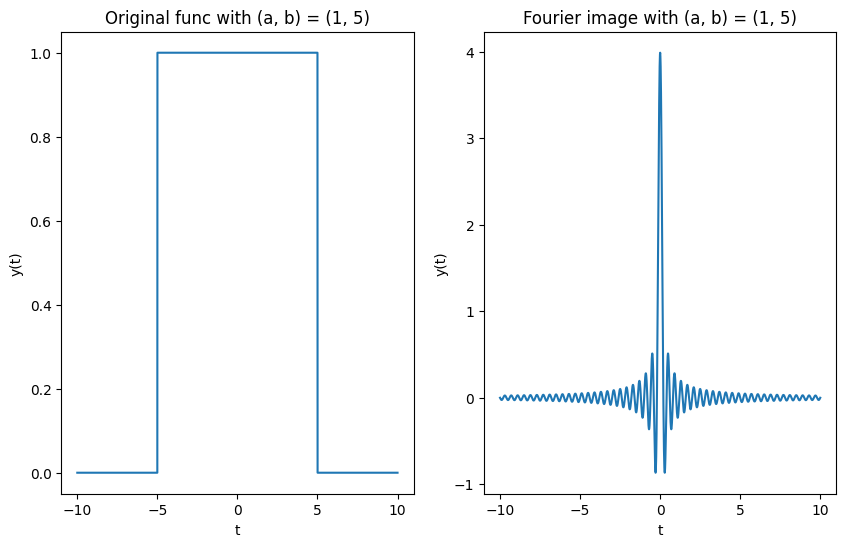

In [ ]:
a = 1; b = 5; plot_original_and_image(x, vec_f1,f1_image)

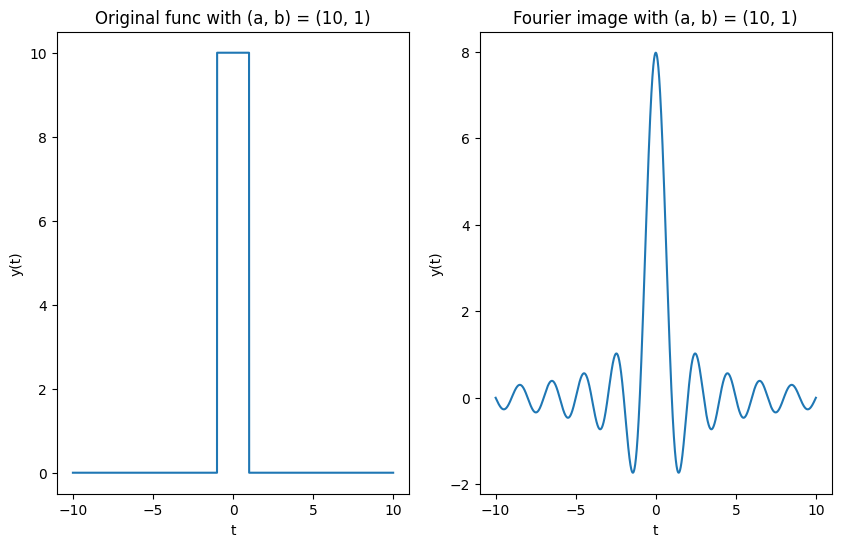

In [ ]:
a = 10; b = 1; plot_original_and_image(x, vec_f1,f1_image)

В данном случае заметная следующая тенденция - при увеличении ширины волны, частота Фурье образа резко взрастает, он становится "сжатым"...



Принцип неопределённости можно привязать здесь следующим образом - чем более концентрированной является функция $f(t)$, тем более разнесенным должно быть её  преобразование Фурье $\hat{f}(\omega)$. В частности, такое свойство можно рассматривать как утверждение: если мы сжимаем функцию в t раз, то её преобразование Фурье растягивается на $\omega$.
**Невозможно** произвольно сконцентрировать как функцию, так и её преобразование Фурье.

Спасибо за это силе википедии, [Принцип неопределённости](https://en.wikipedia.org/wiki/Uncertainty_principle?useskin=vector), [Преобразование фурье](https://en.wikipedia.org/wiki/Fourier_transform?useskin=vector)

*Какая из функций может оказаться в точности равна своему
Фурье-образу?*

блин вроде в лекцциии говорили... а при каких а, б ???

### Треугольная функция



In [ ]:
def f2(t):
    if abs(t) <= b:
        return a - abs(a*t/b)
    elif abs(t) > b:
        return 0

vec_f2 = np.vectorize(f2)

def f2_image(omega):
  return ((a*b)/np.sqrt(np.pi * 2)) * np.sinc(b*omega/2)

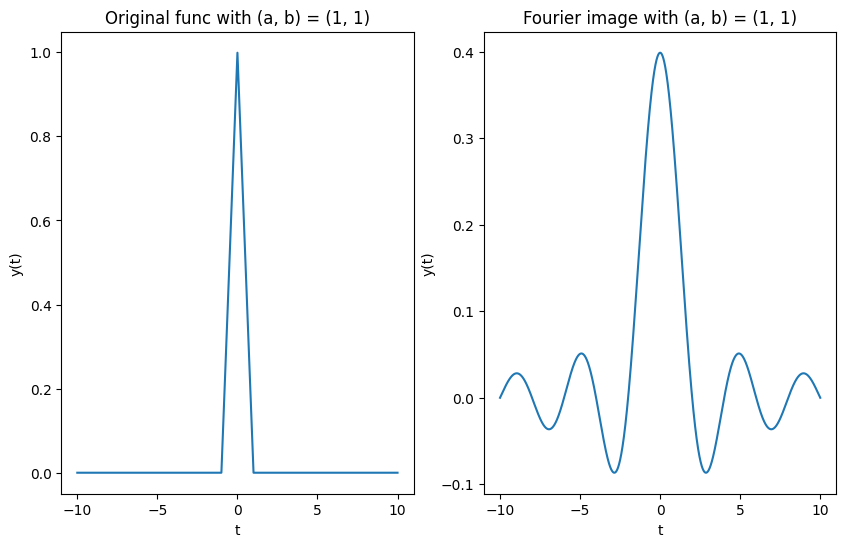

In [ ]:
a = 1; b = 1; plot_original_and_image(x, vec_f2,f2_image)

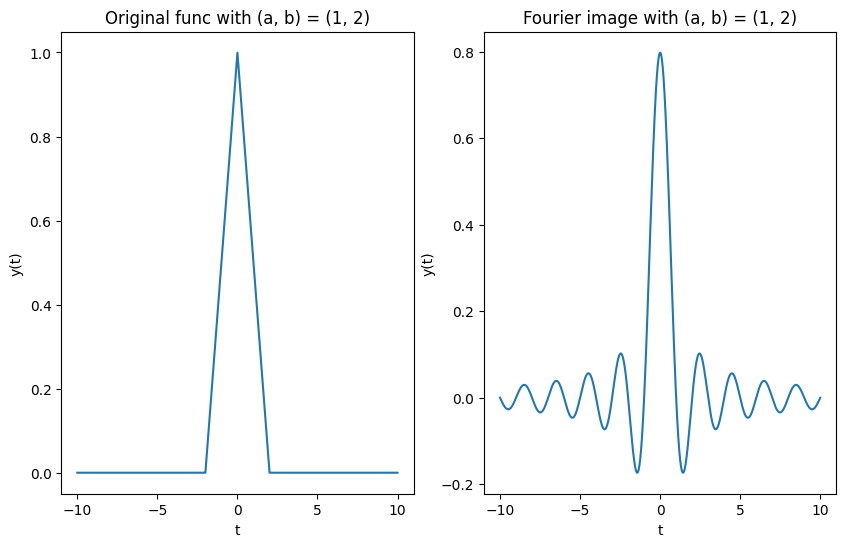

In [ ]:
a = 1; b = 2; plot_original_and_image(x, vec_f2,f2_image)

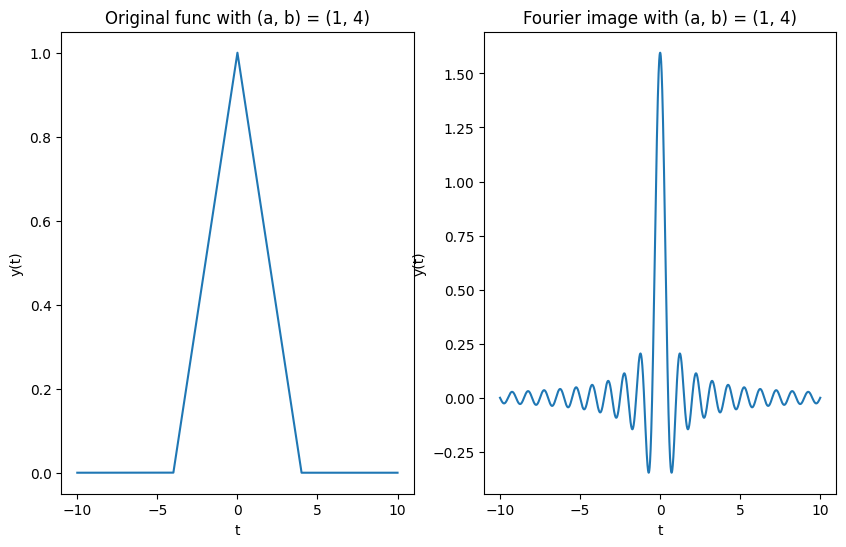

In [ ]:
a = 1; b = 4; plot_original_and_image(x, vec_f2,f2_image)

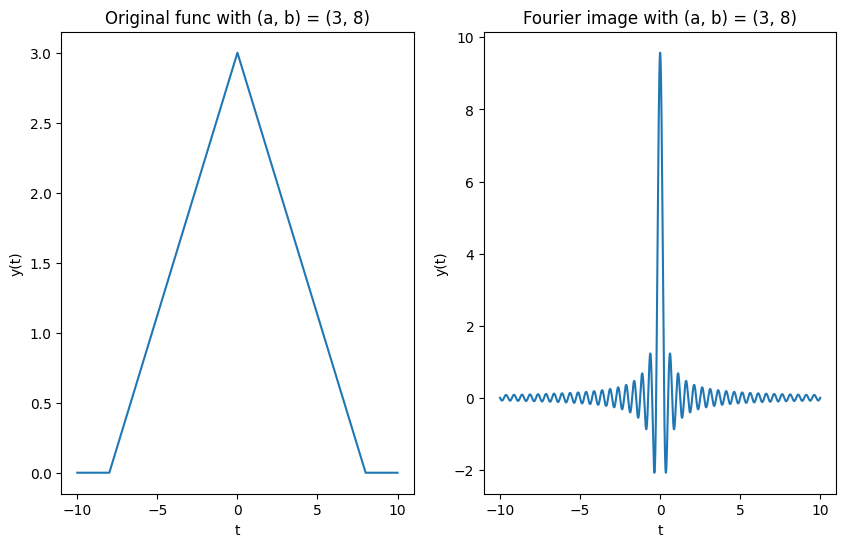

In [ ]:
a = 3; b = 8; plot_original_and_image(x, vec_f2,f2_image)

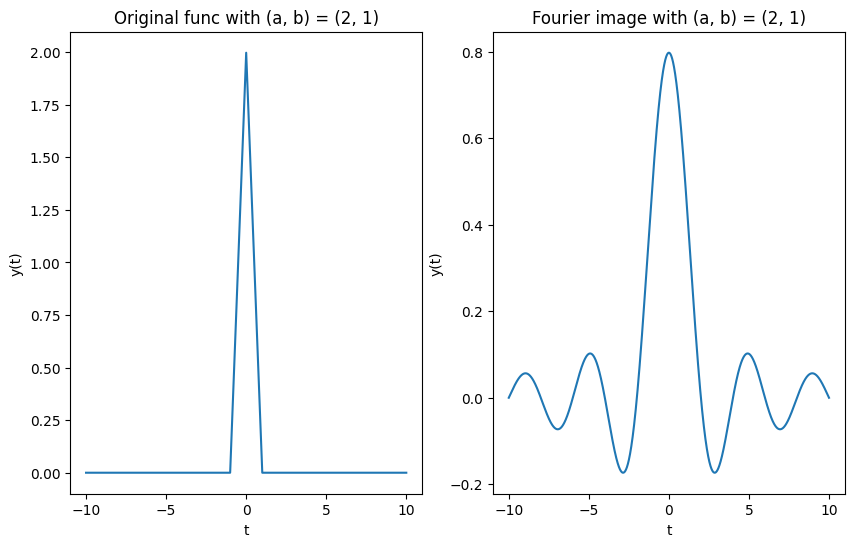

In [ ]:
a =2; b = 1; plot_original_and_image(x, vec_f2,f2_image)

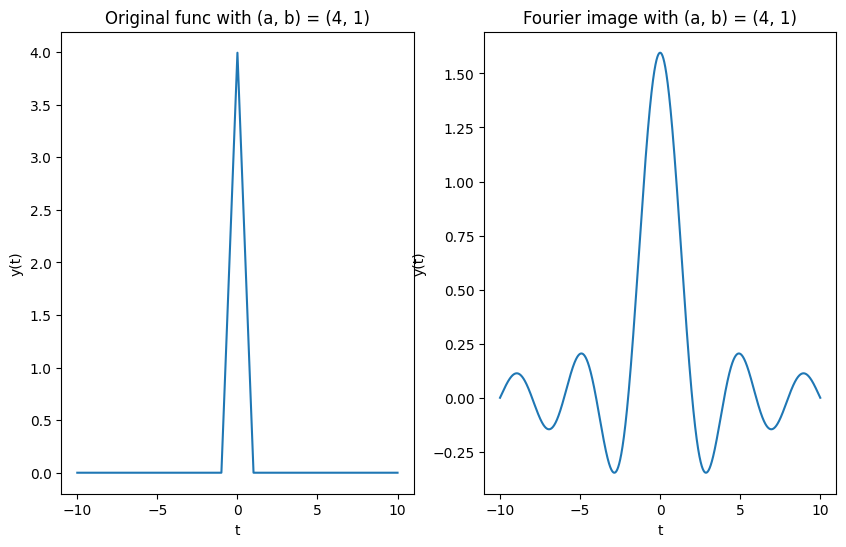

In [ ]:
a = 4; b = 1; plot_original_and_image(x, vec_f2,f2_image)

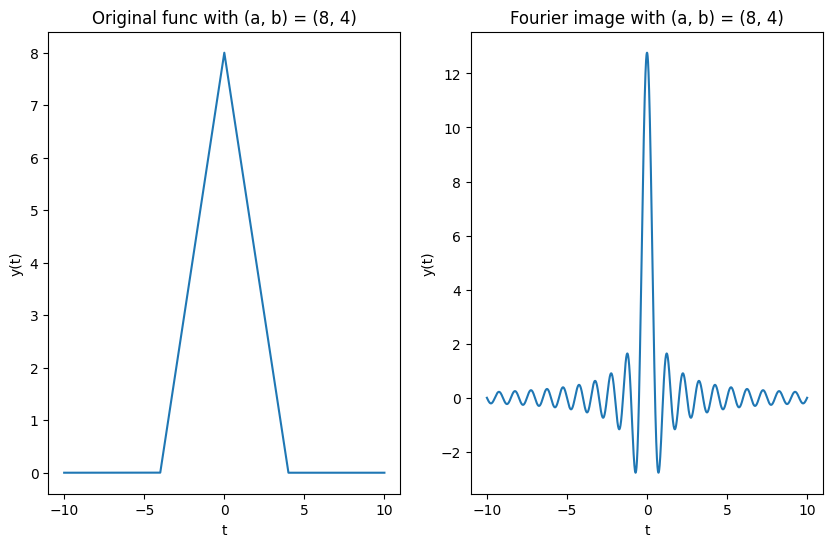

In [ ]:
a = 8; b = 4; plot_original_and_image(x, vec_f2,f2_image)

In [ ]:
check_parseval(vec_f2, f2_image)

integrals: 0.0  0.22765338826883316
errors: 0.0  0.44008436185076083
delta: 0.22765


### Кардинальный синус

In [ ]:
def f3(t):
    return a*np.sinc(b*t)

vec_f3 = np.vectorize(f3)

def f3_image(omega):
  return ( a*np.pi /(2*np.sqrt(2* np.pi)) ) * (np.sign(omega + b) - np.sign(omega - b))

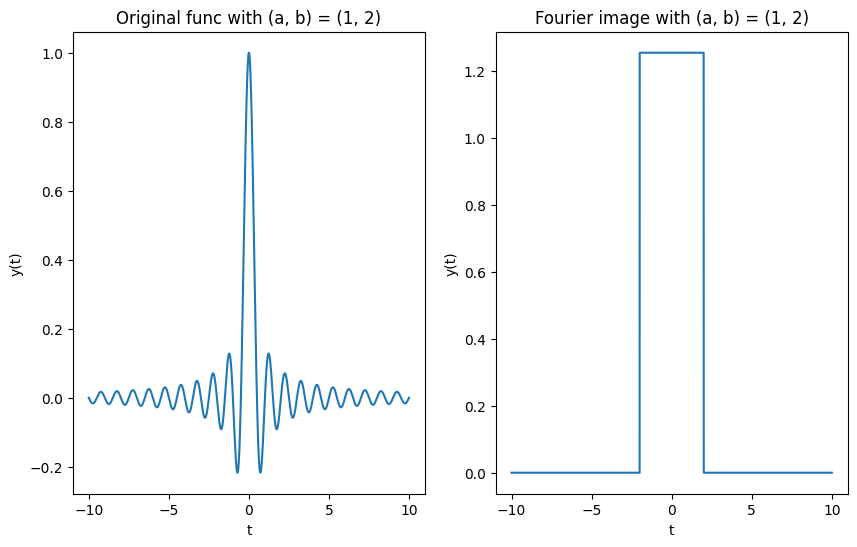

In [ ]:
a = 1; b = 2; plot_original_and_image(x, vec_f3,f3_image)

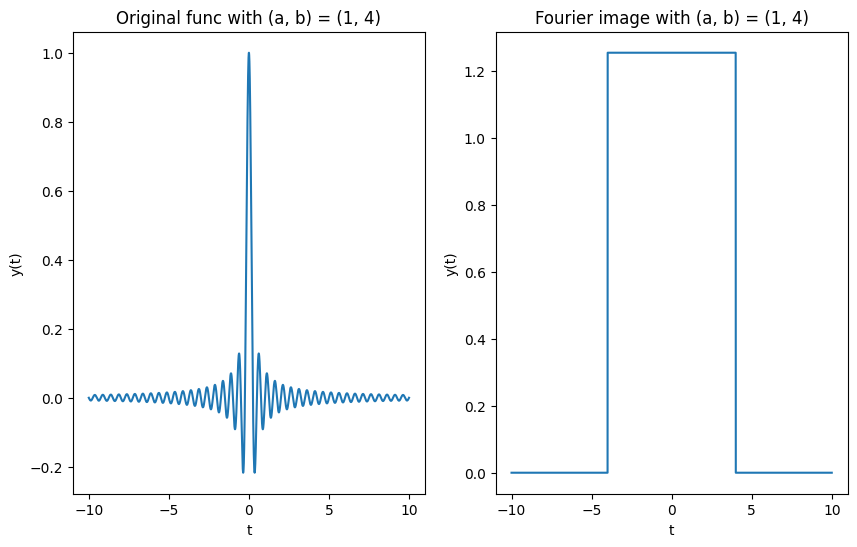

In [ ]:
a = 1; b = 4; plot_original_and_image(x, vec_f3,f3_image)

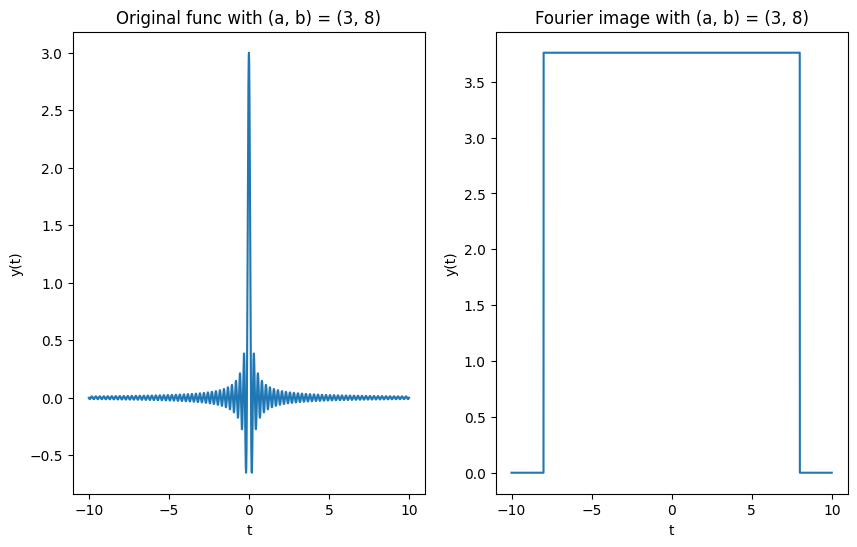

In [ ]:
a = 3; b = 8; plot_original_and_image(x, vec_f3,f3_image)

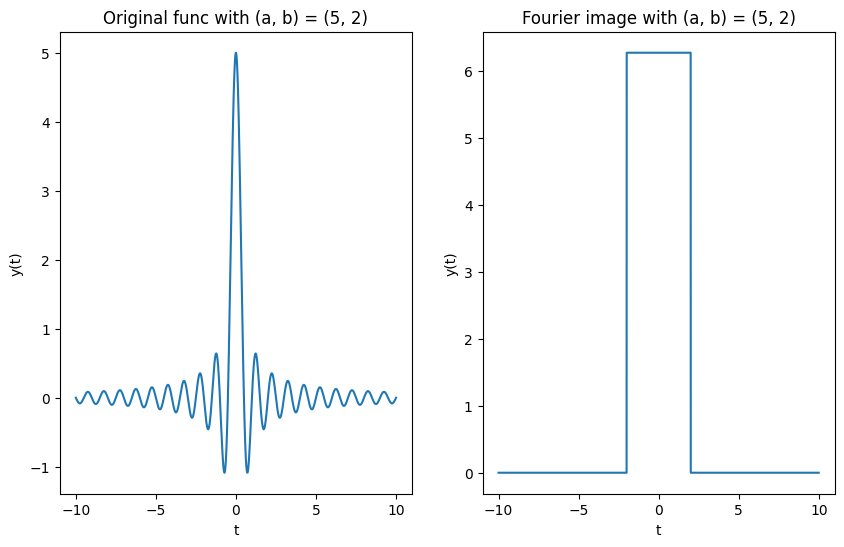

In [ ]:
a = 5; b = 2; plot_original_and_image(x, vec_f3,f3_image)

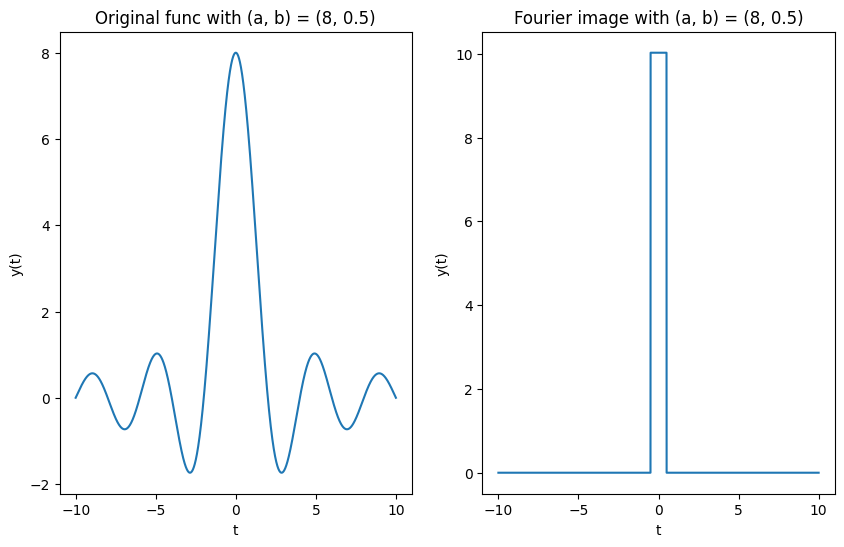

In [ ]:
a = 8; b = 0.5; plot_original_and_image(x, vec_f3,f3_image)

Получается, что параметр $a$ отвечает за длину прямоугольника изображения, а значит и главный горбик функции, параметр b - за растяжение/сжатие прямоугольника, и следовательно, за сжатие/растяжение исходной функции...

In [ ]:
check_parseval(vec_f3, f3_image)

integrals: 0.018423501167958926  0.0
errors: 0.010429435618296871  0.0
delta: 0.01842


### Функция Гаусса

In [ ]:
def f4(t):
    return a*np.exp(-b*t**2)

vec_f4 = np.vectorize(f4)

def f4_image(omega):
  return a * np.sqrt(1 / (2*b)) * np.exp(-omega**2/(4*b))

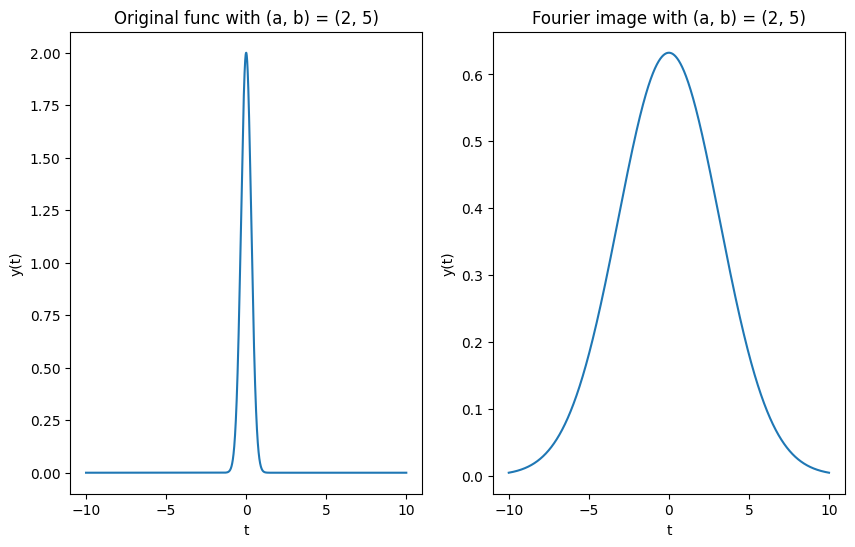

In [ ]:
a = 2; b = 5; plot_original_and_image(x, vec_f4,f4_image)

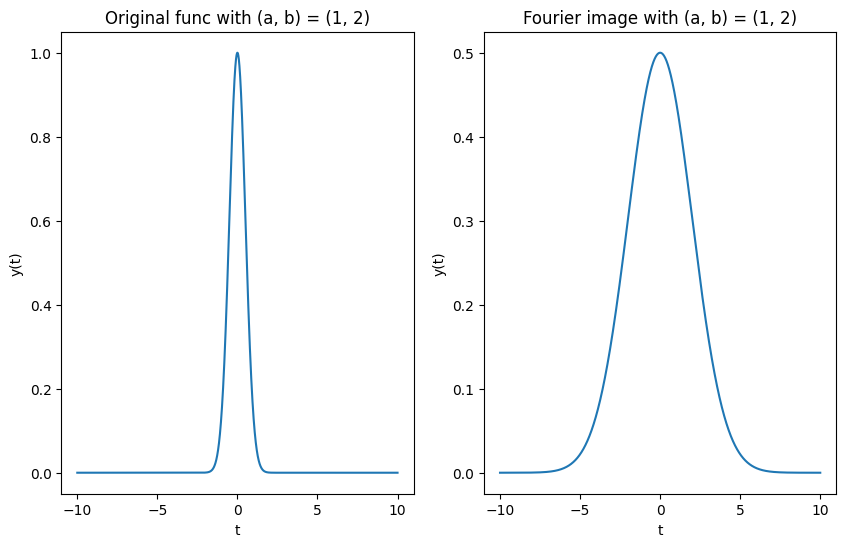

In [ ]:
a = 1; b = 2; plot_original_and_image(x, vec_f4,f4_image)

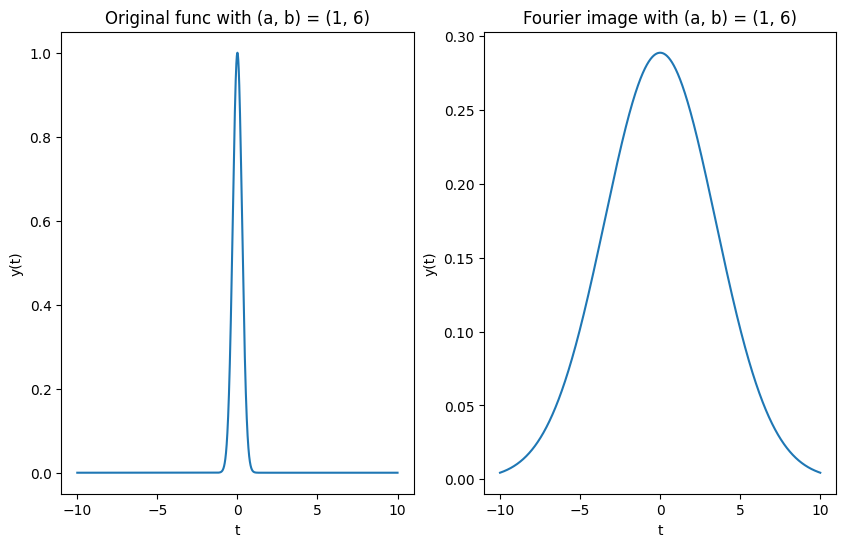

In [ ]:
a = 1; b = 6; plot_original_and_image(x, vec_f4,f4_image)

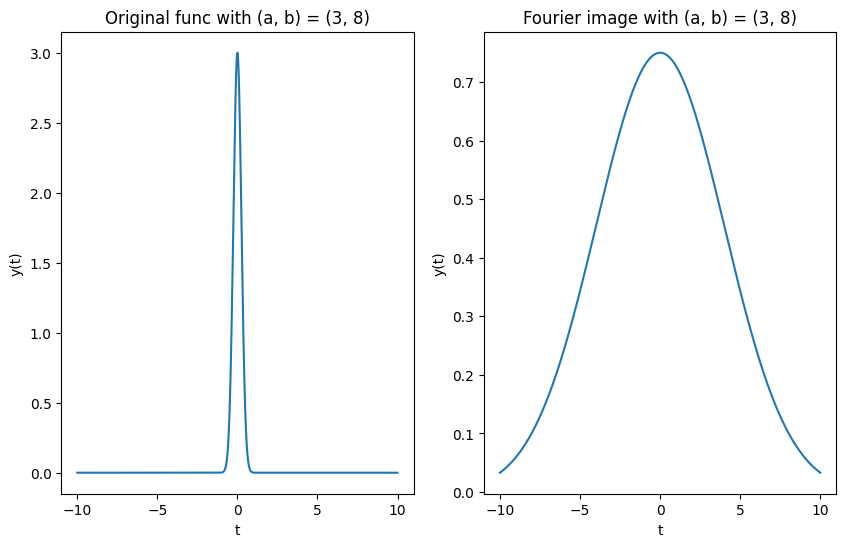

In [ ]:
a = 3; b = 8; plot_original_and_image(x, vec_f4,f4_image)

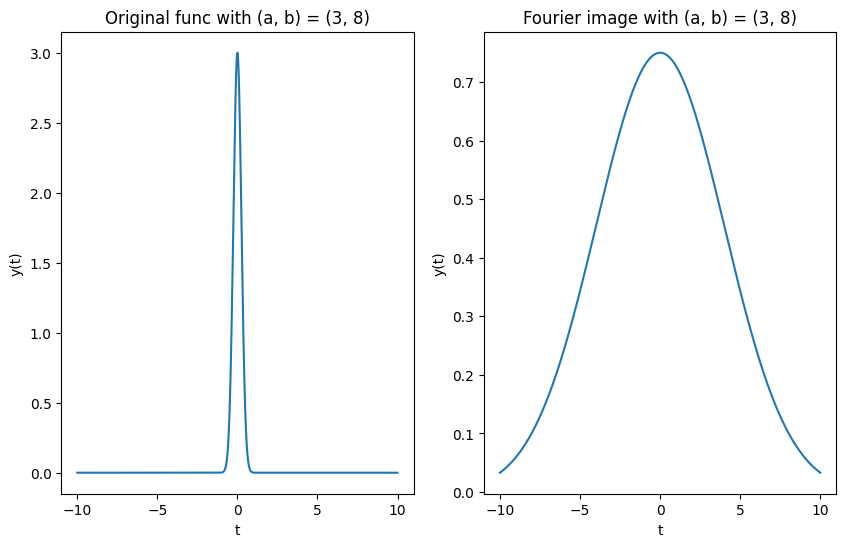

In [ ]:
a = 3; b = 8; plot_original_and_image(x, vec_f4,f4_image)

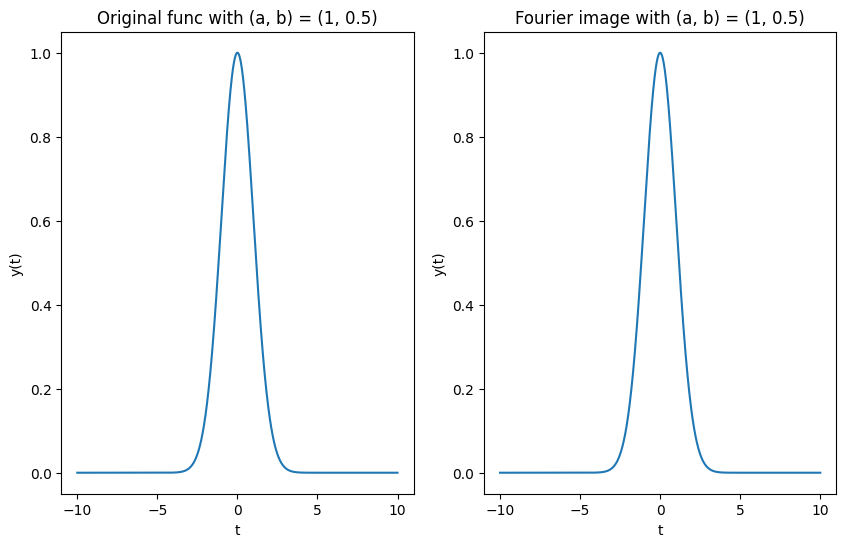

In [ ]:
a = 1; b = 0.5; plot_original_and_image(x, vec_f4,f4_image)

In [ ]:
a = 2; b = 2;check_parseval(f4, f4_image)

integrals: 0.0  0.0
errors: 0.0  0.0
delta: 0.00000


### Двустороннее затухание

In [ ]:
def f5(t):
    return a*np.exp( -b * abs(t) )

vec_f5 = np.vectorize(f5)

def f5_image(omega):
  return (1/np.sqrt(2* np.pi)) * (2*a*b)/(omega**2 + b**2)

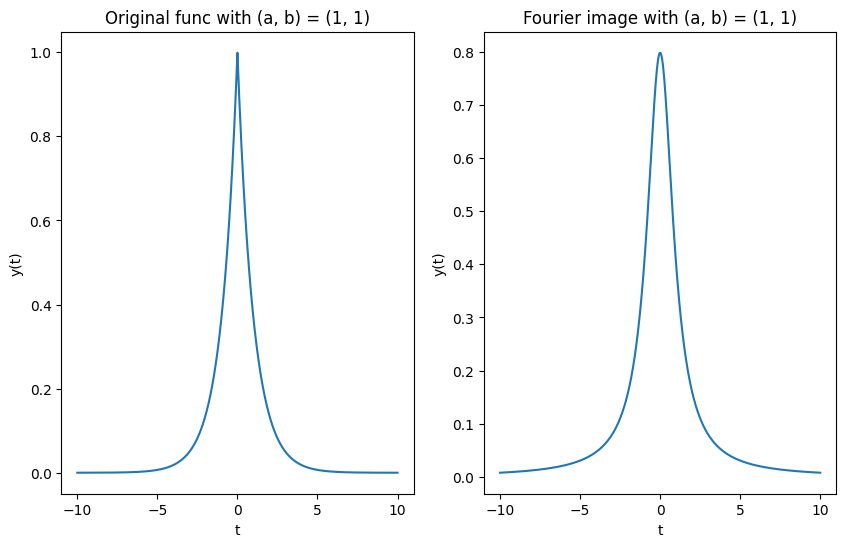

In [ ]:
a = 1; b = 1; plot_original_and_image(x, vec_f5,f5_image)

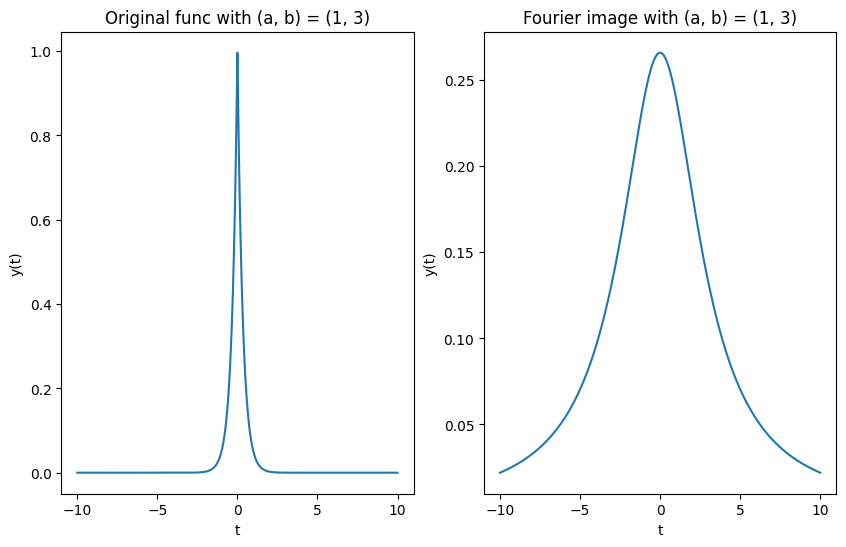

In [ ]:
a = 1; b = 3; plot_original_and_image(x, vec_f5,f5_image)

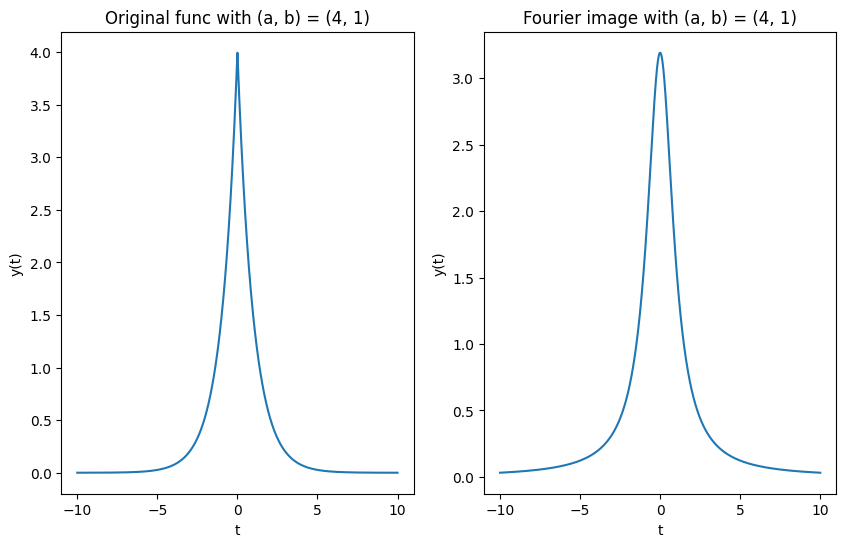

In [ ]:
a = 4; b = 1; plot_original_and_image(x, vec_f5,f5_image)

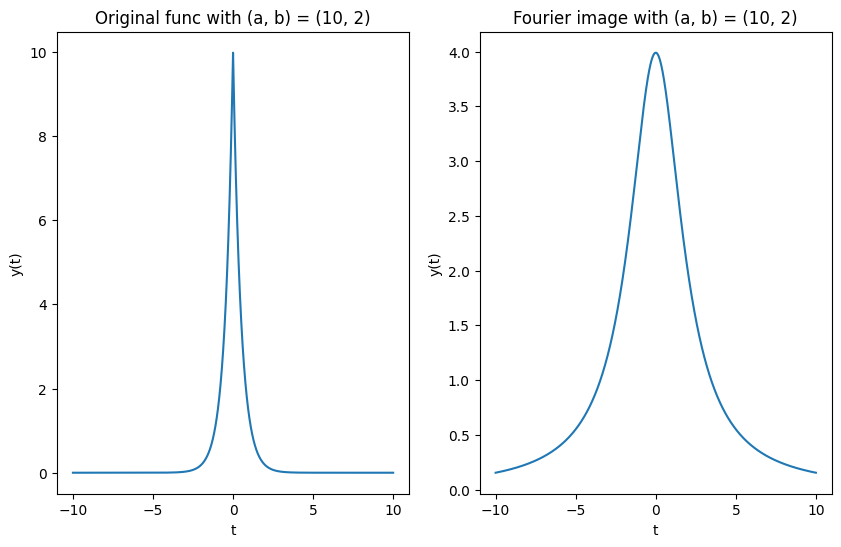

In [ ]:
a = 10; b = 2; plot_original_and_image(x, vec_f5,f5_image)

In [ ]:
check_parseval(vec_f5, f5_image)

integrals: 0.0  1.342497870608422e-10
errors: 0.0  0.0
delta: 0.00000


## Задание 2. Комплексное

Для каждого значения смещения "c" сразу же выводим рядом с оригиналом графики и вещественной, и мнимой компонент образа, и его модуля.


После подытожим все это содержательным выводом о влиянии смещения на эти величины по отдельности и в целом.

In [ ]:
def plot_original_and_image_task2(x, f, f_image):
  figure, axis = plt.subplots(2, 2, figsize=(12, 12))
  # original
  axis[0, 0].plot(x, [f(t) for t in x])
  axis[0, 0].set_title(f"Original func with (a, b, c) = ({a}, {b}, {c})")
  axis[0, 0].set_xlabel('t')
  axis[0,0].set_ylabel('y(t)')
  # module_fourier_image
  axis[0, 1].plot(x, [np.abs(f_image(t)) for t in x])
  axis[0,1].set_title("$|\hat{f}(\\nu)|$")
  axis[0,1].set_xlabel('t')
  axis[0,1].set_ylabel('y(t)')

  # real part
  axis[1, 0].plot(x, [f_image(t).real for t in x])
  axis[1, 0].set_title("Re$[\hat{f}(\\nu)]$")
  axis[1, 0].set_xlabel('t')
  axis[1, 0].set_ylabel('y(t)')
  # complex part
  axis[1, 1].plot(x, [f_image(t).imag for t in x])
  axis[1, 1].set_title("Im$[\hat{f}(\\nu)]$")
  axis[1, 1].set_xlabel('t')
  axis[1, 1].set_ylabel('y(t)')
  plt.show()

Рассмотрим треугольную функцию

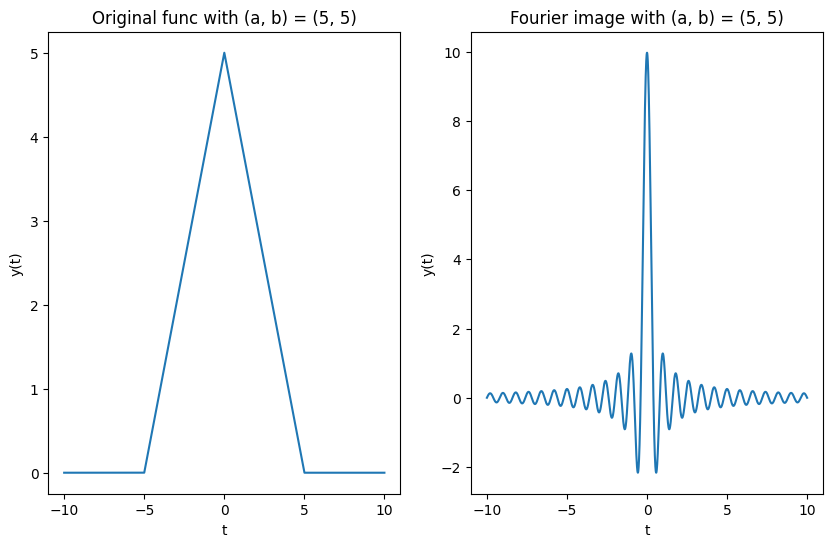

In [ ]:
a=5;b=5; plot_original_and_image(x, vec_f2,f2_image)

Рассмотрим сдвинутую функцию $g(t) = f(t+c)$

Приведите аналитическое выражения для Фурье-образа $\hat{g}(\omega)$

In [ ]:
c = -3

In [ ]:
# shifted triangle function
def f6(t):
  T = t+c
  if abs(T) <= b:
    return a - abs(a*T/b)
  elif abs(T) > b:
    return 0

vec_f6 = np.vectorize(f6)

def f6_image(omega):
  return f2_image(omega) * np.exp(1j*omega*c)

Воспользуемся свойством оператора Фурье: для сдвига можно не вычислять новый образ, а воспользоваться свойством:

$$
\mathbb{F}f(t+\tau) = e^{i \omega\tau}\mathbb{F}f(t)
$$, где $\tau$- наш сдвиг

Постройте графики $Re\hat{g}(\omega)$ и $Im\hat{g}(\omega)$ вещественной и мнимой компоненты Фурье образа, а также график $|\hat{g}(\omega)|$ модуля Фурье-образа для каждого случа

Проанализируйте влияние параметра $c$ на саму функцию и её Фурье-образ

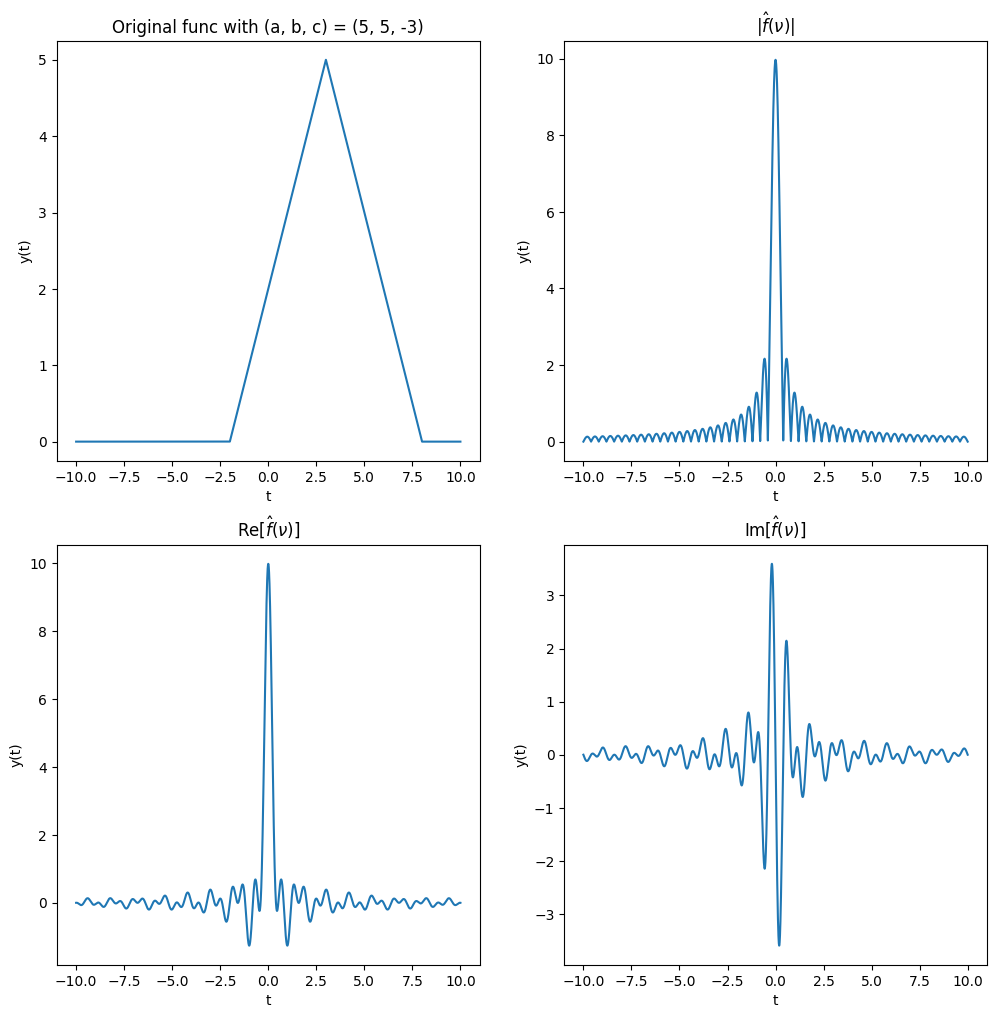

In [ ]:
plot_original_and_image_task2(x, vec_f6, f6_image)

Постройте графики функции $g(t)$ для нескольких значений параметра $c$

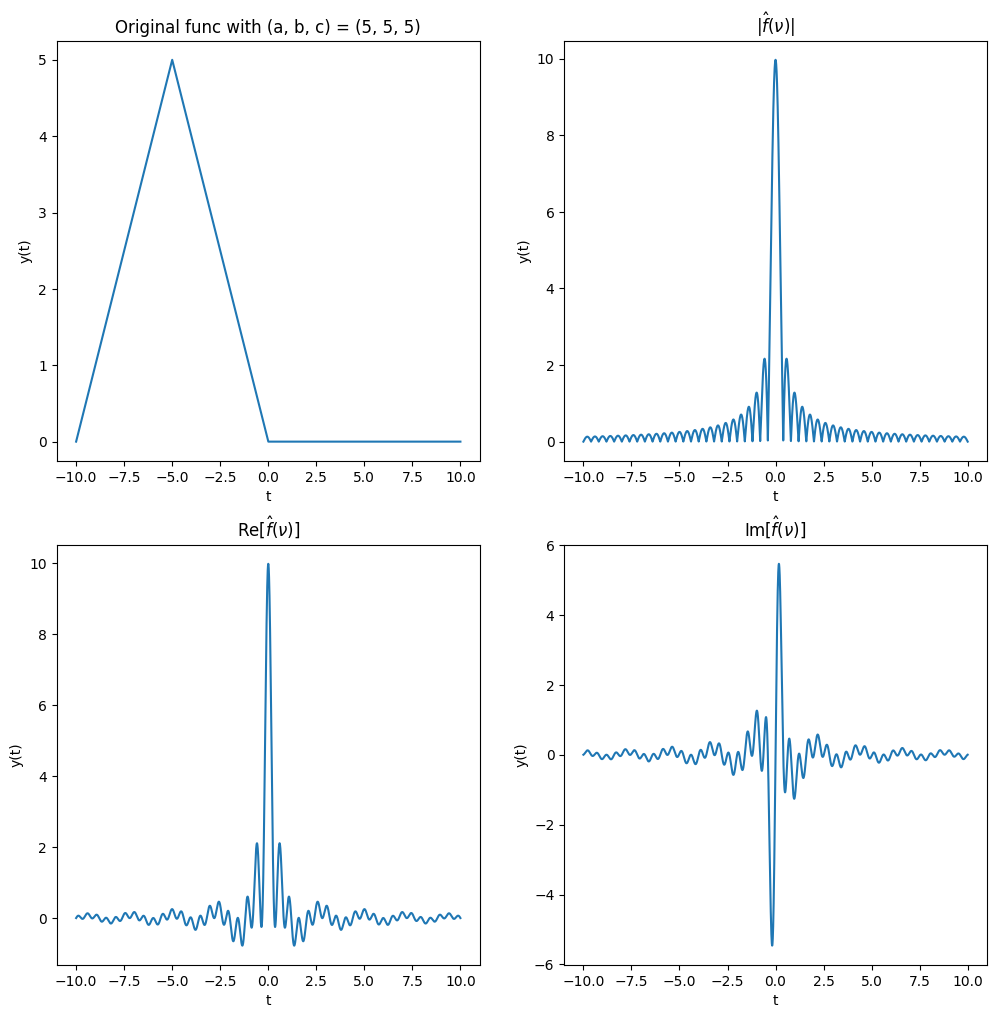

In [ ]:
c = 5; plot_original_and_image_task2(x, vec_f6, f6_image)

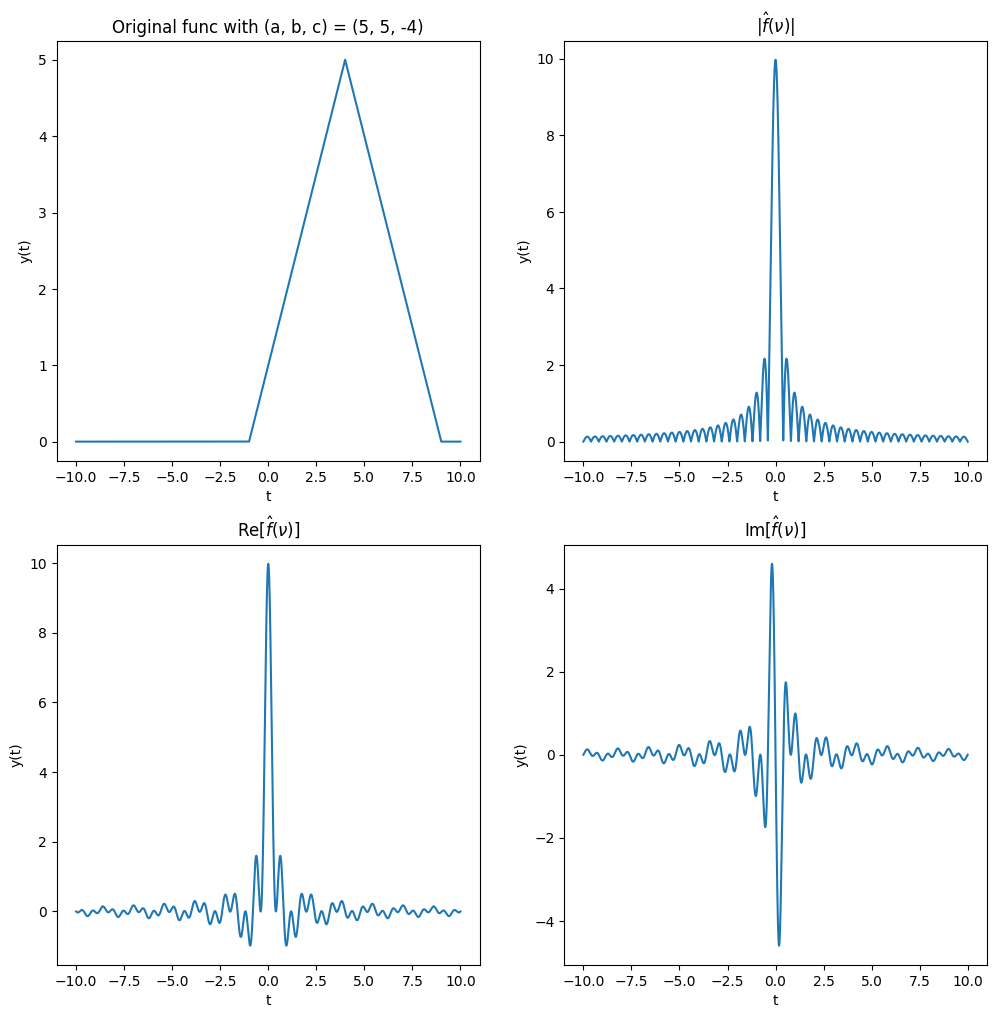

In [ ]:
c = -4; plot_original_and_image_task2(x, vec_f6, f6_image)

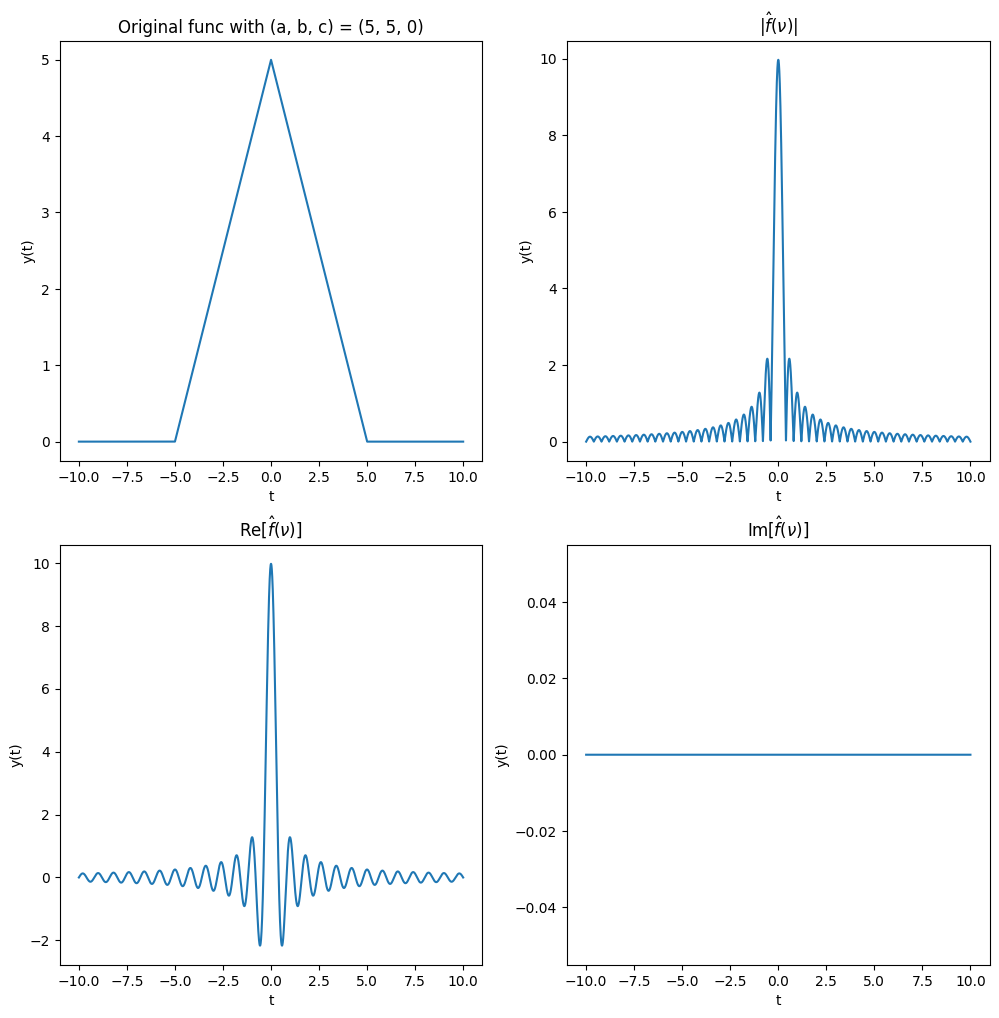

In [ ]:
c = 0; plot_original_and_image_task2(x, vec_f6, f6_image)

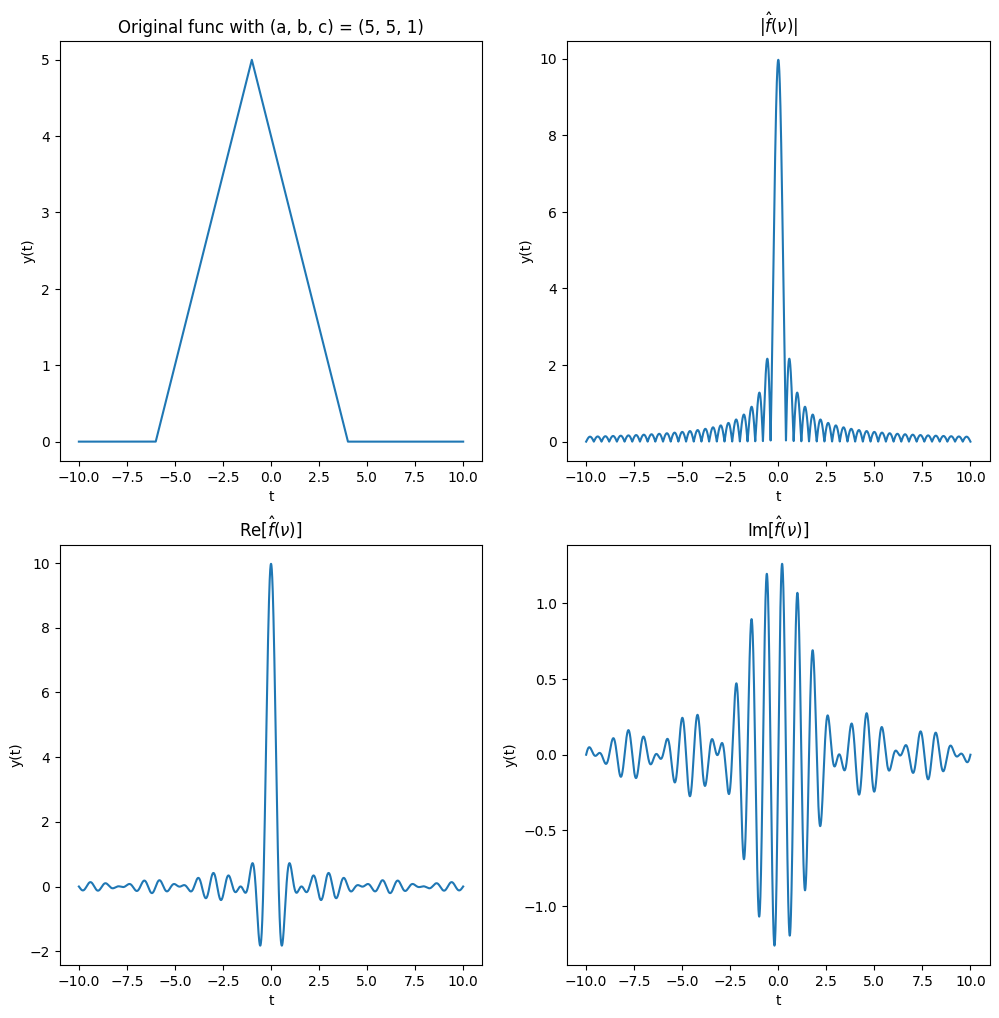

In [ ]:
c = 1; plot_original_and_image_task2(x, vec_f6, f6_image)

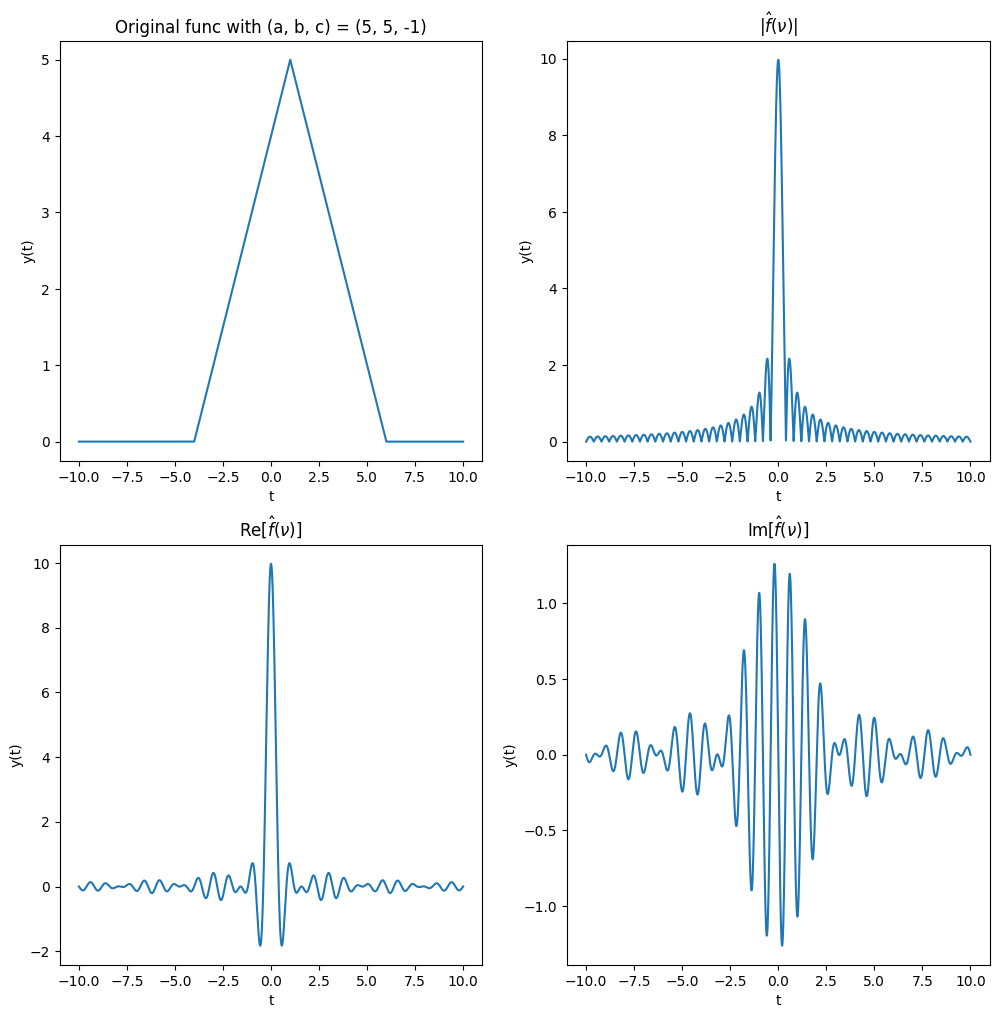

In [ ]:
c = -1; plot_original_and_image_task2(x, vec_f6, f6_image)

Проверка равенства Парсеваля

Предыдущая функция уже в себя включает работу с комплксным представлением (abs() использует), поэтому ничего менять не придётся

In [ ]:
a=5; b=5; c = 1; check_parseval(vec_f6, f6_image)

integrals: 0.0  0.004677206363329836
errors: 0.0  0.007721979377493091
delta: 0.00468


In [ ]:
a=5; b=5; c = 5; check_parseval(vec_f6, f6_image)

integrals: 0.0  0.004677206363329836
errors: 0.0  0.007721979377493091
delta: 0.00468


In [ ]:
a=5; b=5; c = -3; check_parseval(vec_f6, f6_image)

integrals: 0.0  0.004677206363329836
errors: 0.0  0.007721979377493091
delta: 0.00468


## Задание 3. Музыкальное

Здесь используем преобразование Фурье к обыкновенной частоте $\nu$.


На гугл диске только mp3 файлы, поэтому я воспользовался случайным конвертером в wav формат

In [ ]:
from scipy.io import wavfile

In [ ]:
sample_rate = 44100 # Hz

def plot_sound(file, time_limit=-1, caption = ''):
  data, sample_rate = librosa.load(file)
  length = data.shape[0]/sample_rate
  time = np.linspace(0., length, data.shape[0])
  # data.shape = 2 --> so that's a stereo
  if time_limit == -1:
    plt.plot(time, data[:, 1], label="mono")
  else:
    plt.plot(time[:int(np.ceil(time_limit*sample_rate))], data[:int(np.ceil(time_limit*sample_rate))], label="mono")
  plt.title(caption)
  plt.legend(loc='lower right')
  plt.xlabel("Time [s]")
  plt.ylabel("Amplitude")
  plt.show()



Чтобы упростить себе жизнь, будем анализировать первые две секунды

Образ Звука и Постройте график $|\hat{f}(\nu)|$

Не понимаю почему, но..... без scipy попробую ка

In [ ]:
data, sample_rate = librosa.load('accord7.mp3')
# data, sample_rate = librosa.load('280hz.wav')

print(sample_rate)
print(data)
print(len(data))

22050
[-1.6272441e-04 -2.4021231e-04 -1.8027797e-04 ... -1.7819266e-06
 -7.5129547e-06  7.7845732e-07]
198431


In [ ]:
sound_from_time = np.vectorize(lambda t: data[int(t * sample_rate)])
# отступаем чуть времени, чтобы с индексацией по массивам было проще
length = len(data) / sample_rate - 0.005
print(length)


8.994138321995464


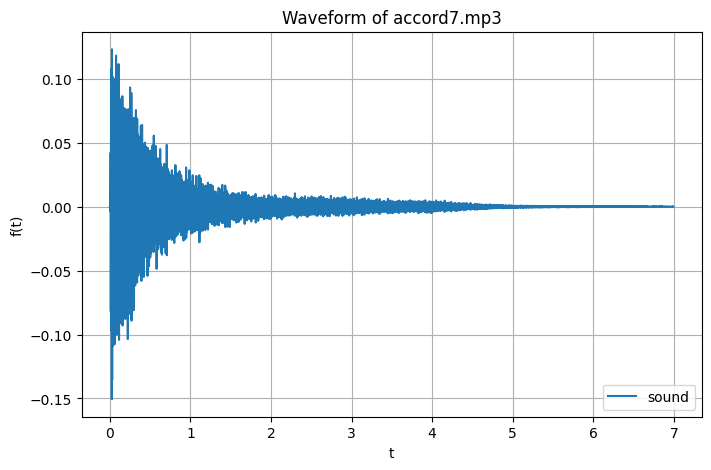

In [ ]:
def plot_sound(wave, time, caption = '', ):
    # отступаем чуть времени, чтобы с индексацией по массивам было проще
    t = np.linspace(0, time - 2, 10000)
    plt.figure(figsize=(8, 5))

    plt.plot(t, wave(t))
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend(['sound'], loc='lower right')
    # add caption
    plt.title(caption)
    plt.grid()

plot_sound(sound_from_time, length, caption='Waveform of accord7.mp3',)


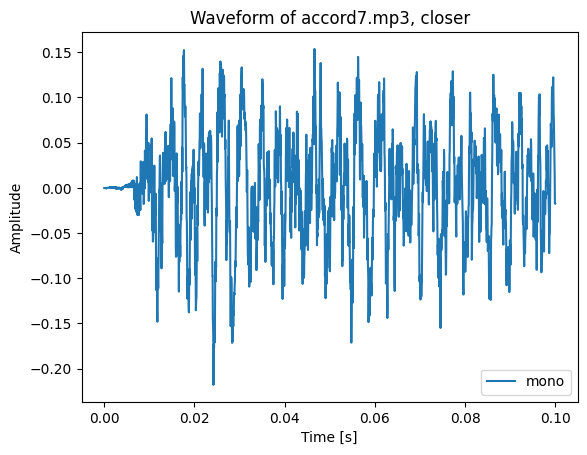

In [ ]:
plot_sound('accord7.mp3', 0.1, caption='Waveform of accord7.mp3, closer')

In [ ]:
def plot_wave_image(func, V_min, V_max, caption):

    values = func(np.linspace(V_min, V_max, 1000))
    ymin = min(values.real.min(), values.imag.min())
    ymax = max(values.real.max(), values.imag.max())

    ymax = ymax + 0.1 * (ymax - ymin)
    ymin = ymin - 0.1 * (ymax - ymin)

    x = np.linspace(V_min, V_max, 1000)
    plt.figure(figsize=(10, 8))

    plt.ylim(ymin, ymax)
    plt.plot(x, func(x))
    plt.xlabel('v')
    plt.ylabel('f(v)')
    plt.legend(['Image'], loc='lower right')
    plt.title(caption)
    plt.grid()

In [ ]:
def dot_prod(f, g, a, b):
    x = np.linspace(a, b, 1000)
    dx = x[1] - x[0]
    return np.dot(f(x), g(x)) * dx

In [ ]:
def wave_fourier_image(func, a, b):
    image = lambda v: dot_prod(func, lambda t: np.e ** (-2 * np.pi * 1j * v * t), a, b)
    return np.vectorize(image)

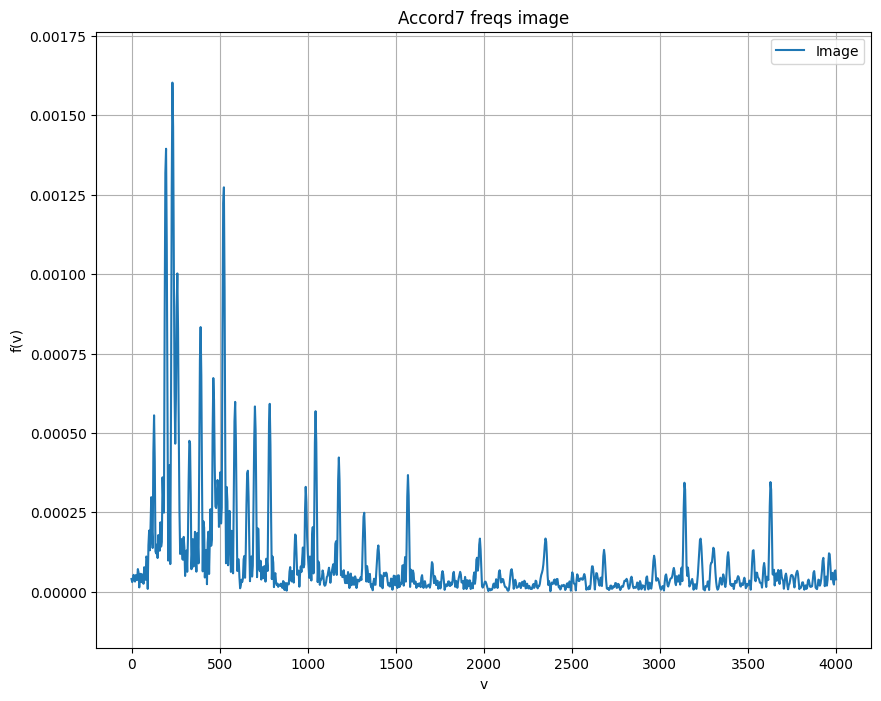

In [ ]:
# fourier transform
wave_image = wave_fourier_image(sound_from_time, 0, 0.09)
wave_image_abs = lambda t: abs(wave_image(t))
plot_wave_image(wave_image_abs, 0, 4000, caption='Accord7 freqs image')


In [ ]:
class myarray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(myarray)
    def index(self, value):
        return np.where(self == value)

In [ ]:
# n - count of maximum freqs values
def get_max_freqs_from_sound(n):
  vvv = np.linspace(0,4000,1000)
  amplitudes = np.array([wave_image_abs(t) for t in vvv])


  sorted_index_array = np.argsort(amplitudes)
  sorted_array = amplitudes[sorted_index_array]


  rslt = sorted_array[-n : ]
  for i in range(n):
    freq = vvv[ myarray(amplitudes).index(rslt[i])[0][0] ]
    print(f"{i} largest: AMPLITUDE -- {rslt[i]:.6f} ; FREQ -- {freq:.1f} Hz")



get_max_freqs_from_sound(5)

0 largest: AMPLITUDE -- 0.001273 ; FREQ -- 524.5 Hz
1 largest: AMPLITUDE -- 0.001319 ; FREQ -- 192.2 Hz
2 largest: AMPLITUDE -- 0.001395 ; FREQ -- 196.2 Hz
3 largest: AMPLITUDE -- 0.001464 ; FREQ -- 236.2 Hz
4 largest: AMPLITUDE -- 0.001603 ; FREQ -- 232.2 Hz


-------------------------------------

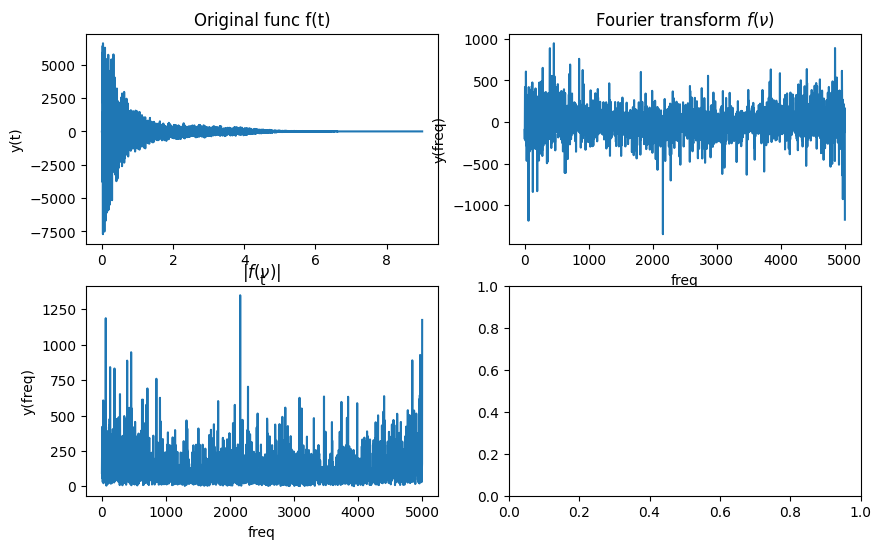

In [ ]:
# def f7(t):
#   if  0<= t <= length:
#     return data[int(np.ceil(t*sample_rate))-1, 1]
#   else:
#     return 0

# freq_space = np.linspace(0,5000, 2500)


# def get_fourier_transform(freq):
#     return spi.quad(lambda t: f7(t)*np.exp(-1j*2*np.pi*freq*t), 0, int(length))[0]

# f7_image = np.array([get_fourier_transform(freq) for freq in freq_space])


# def plot_music_freqs_image(time,freqs, f, f_image):
#   figure, axis = plt.subplots(2, 2, figsize=(10, 6))

#   axis[0,0].plot(time, [f(t) for t in time])
#   axis[0,0].set_title(f"Original func f(t)")
#   axis[0,0].set_xlabel('t')
#   axis[0,0].set_ylabel('y(t)')

#   axis[0,1].plot(freqs, f7_image)
#   axis[0,1].set_title(f"Fourier transform $f(\\nu)$")
#   axis[0,1].set_xlabel('freq')
#   axis[0,1].set_ylabel('y(freq)')

#   axis[1,0].plot(freqs, abs(f7_image))
#   axis[1,0].set_title("|$f(\\nu)$|")
#   axis[1,0].set_xlabel('freq')
#   axis[1,0].set_ylabel('y(freq)')

#   plt.show()

# plot_music_freqs_image(time, freq_space, f7, f7_image)

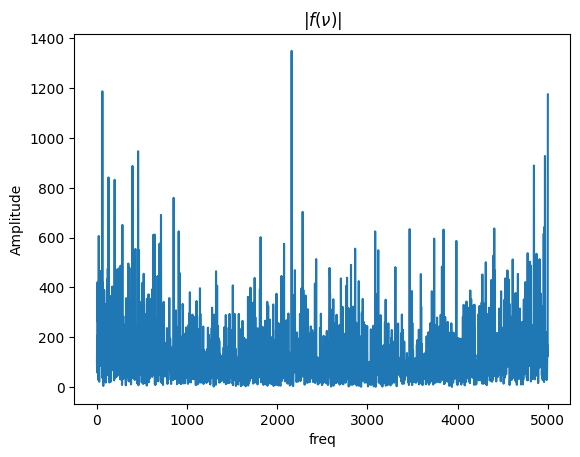

0 largest value:[]
1 largest value:[]
2 largest value:[]
3 largest value:[]
4 largest value:[]
[691.13859685 759.64467902 887.60683267 889.56694736 946.80276245]


In [ ]:
def plot_freqs(time,freqs, f, f_image):
  plt.figsize=(12, 8)
  plt.plot(freqs, abs(f7_image))
  plt.title("|$f(\\nu)$|")
  plt.xlabel('freq')
  plt.ylabel('Amplitude')
  plt.show()

  n = 5
  sorted_index_array = np.argsort(f7_image)
  sorted_array = f7_image[sorted_index_array]

  rslt = sorted_array[-n : ]
  for i in range(n):
    idx, = np.where(freqs == rslt[i])
    print(f"{i} largest value:{idx}")
  print(rslt)
plot_freqs(time, freq_space, f7, abs(f7_image))


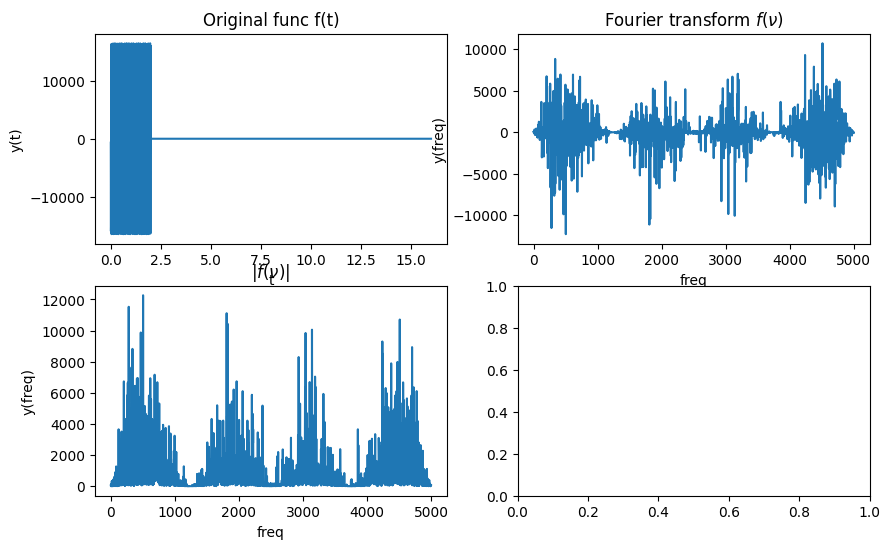

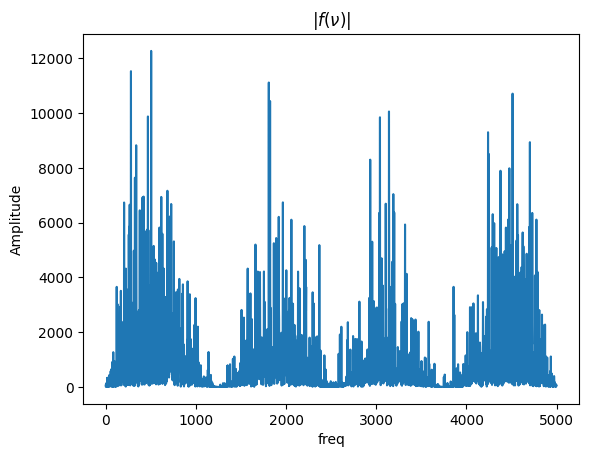

0 largest value:[]
1 largest value:[]
2 largest value:[]
3 largest value:[]
4 largest value:[]
[ 7040.53732984  7894.67069076  8825.23389759  9300.22226636
 10710.44498645]


In [ ]:
sample_rate, data = wavfile.read('280hz.wav')
length = data.shape[0]/sample_rate
time = np.linspace(0., length, 5000)

# up to 2 seconds
def f7(t):
  if  0<= t <= 2:
    return data[int(np.ceil(t*sample_rate))-1, 1]
  else:
    return 0

freq_space = np.linspace(0,5000, 2500)


def get_fourier_transform(freq):
    return spi.quad(lambda t: f7(t)*np.exp(-1j*2*np.pi*freq*t), 0, int(length))[0]

f7_image = np.array([get_fourier_transform(freq) for freq in freq_space])


def plot_music_freqs_image(time,freqs, f, f_image):
  figure, axis = plt.subplots(2, 2, figsize=(10, 6))

  axis[0,0].plot(time, [f(t) for t in time])
  axis[0,0].set_title(f"Original func f(t)")
  axis[0,0].set_xlabel('t')
  axis[0,0].set_ylabel('y(t)')

  axis[0,1].plot(freqs, f7_image)
  axis[0,1].set_title(f"Fourier transform $f(\\nu)$")
  axis[0,1].set_xlabel('freq')
  axis[0,1].set_ylabel('y(freq)')

  axis[1,0].plot(freqs, abs(f7_image))
  axis[1,0].set_title("|$f(\\nu)$|")
  axis[1,0].set_xlabel('freq')
  axis[1,0].set_ylabel('y(freq)')

  plt.show()

plot_music_freqs_image(time, freq_space, f7, f7_image)
plot_freqs(time, freq_space, f7, abs(f7_image))